In [82]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


plt.style.use({'figure.facecolor':'white'})

In [83]:
data = fetch_20newsgroups(subset='all',shuffle=True, random_state=42)
names = data.target_names
names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### use 'rec.' categories only:

In [84]:
cats = ['rec.motorcycles', 'rec.autos', 'rec.sport.baseball', 'rec.sport.hockey']
rec_train = fetch_20newsgroups(subset='train',categories=cats, shuffle=True, random_state=42)
rec_test = fetch_20newsgroups(subset='test',categories=cats, shuffle=True, random_state=42)
target_names = rec_train.target_names
target_names

['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

In [85]:
rec_train.target_names
len(rec_train.data)

2389

In [86]:
df = pd.DataFrame(rec_train.target).value_counts()
df

3    600
1    598
2    597
0    594
dtype: int64

In [87]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X_train = vectorizer.fit_transform(rec_train.data)
X_test = vectorizer.transform(rec_test.data)
y_train, y_test = rec_train.target, rec_test.target

In [88]:
print(len(y_train), len(y_test))
print(X_train.shape, X_test.shape)

2389 1590
(2389, 17529) (1590, 17529)


## SVM:

In [89]:
svm = SVC()
svm.fit(X_train.toarray(), y_train)

SVC()

In [90]:
svm_pred_train = svm.predict((X_train.toarray()))
train_score = accuracy_score(y_train, svm_pred_train) *100
print(f"Train accuracy score: {train_score:.2f}%")

svm_pred_test = svm.predict(X_test.toarray())
test_score = accuracy_score(y_test, svm_pred_test) * 100
print(f"Test accuracy score: {test_score:.2f}%")


Train accuracy score: 99.96%
Test accuracy score: 96.04%


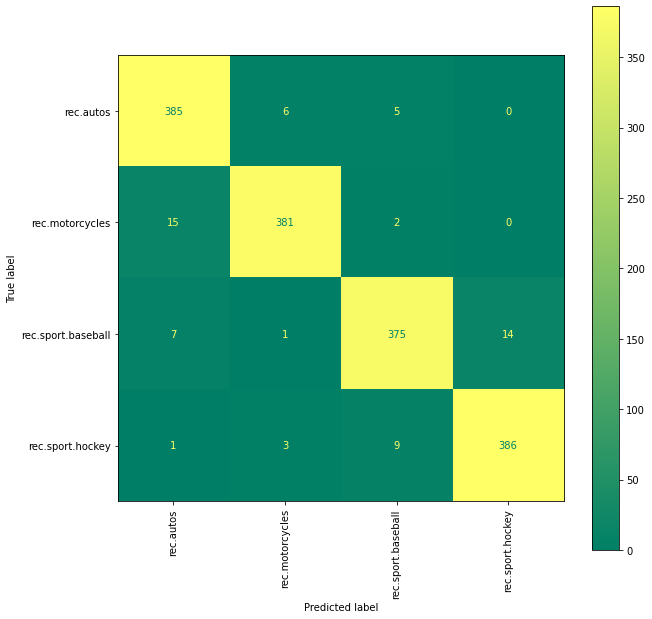

In [91]:
cm = confusion_matrix(y_test, svm_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rec_train.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()

In [92]:
pd.DataFrame(classification_report(y_test,svm_pred_test, output_dict=True)).T


,precision,recall,f1-score,support
0,0.943627,0.972222,0.957711,396.000000
1,0.974425,0.957286,0.965779,398.000000
2,0.959079,0.944584,0.951777,397.000000
3,0.965000,0.967419,0.966208,399.000000
accuracy,0.960377,0.960377,0.960377,0.960377
macro avg,0.960533,0.960378,0.960369,1590.000000
weighted avg,0.960558,0.960377,0.960381,1590.000000


## Naive Bayes:

In [93]:
nb = GaussianNB()
nb.fit(X_train.toarray(), y_train)

GaussianNB()

In [94]:
nb_pred_train = nb.predict((X_train.toarray()))
nb_train_score = accuracy_score(y_train, nb_pred_train) *100
print(f"Train accuracy score: {nb_train_score:.2f}%")

nb_pred_test = nb.predict(X_test.toarray())
nb_test_score = accuracy_score(y_test, nb_pred_test) * 100
print(f"Test accuracy score: {nb_test_score:.2f}%")


Train accuracy score: 99.92%
Test accuracy score: 90.57%


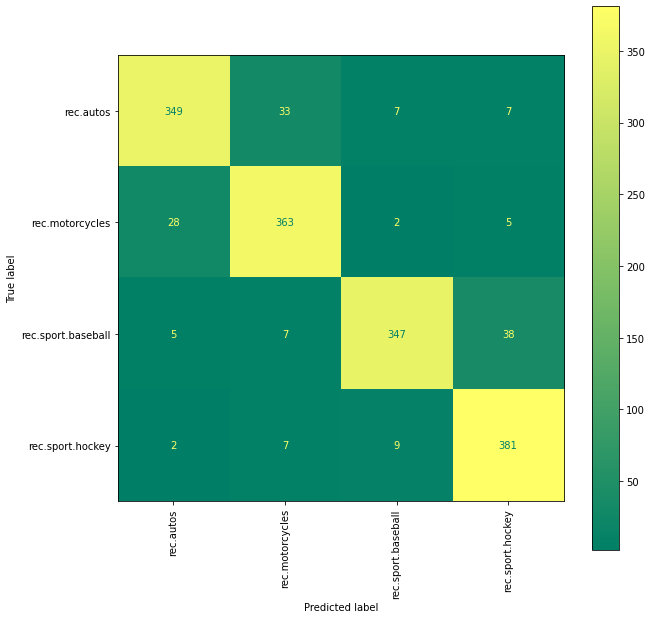

In [95]:
cm = confusion_matrix(y_test, nb_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rec_train.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()


In [96]:
pd.DataFrame(classification_report(y_test, nb_pred_test, output_dict=True)).T


,precision,recall,f1-score,support
0,0.908854,0.881313,0.894872,396.00000
1,0.885366,0.912060,0.898515,398.00000
2,0.950685,0.874055,0.910761,397.00000
3,0.883991,0.954887,0.918072,399.00000
accuracy,0.905660,0.905660,0.905660,0.90566
macro avg,0.907224,0.905579,0.905555,1590.00000
weighted avg,0.907180,0.905660,0.905573,1590.00000


## Neural Network:

In [97]:
nn = MLPClassifier(max_iter=200)

In [98]:
nn.fit(X_train, y_train)

MLPClassifier()

In [99]:
nn_pred_train = nn.predict((X_train))
train_score = accuracy_score(y_train, nn_pred_train) *100
print(f"Train accuracy score: {train_score:.2f}%")

nn_pred_test = nn.predict(X_test)
test_score = accuracy_score(y_test, nn_pred_test) * 100
print(f"Test accuracy score: {test_score:.2f}%")


Train accuracy score: 99.96%
Test accuracy score: 96.73%


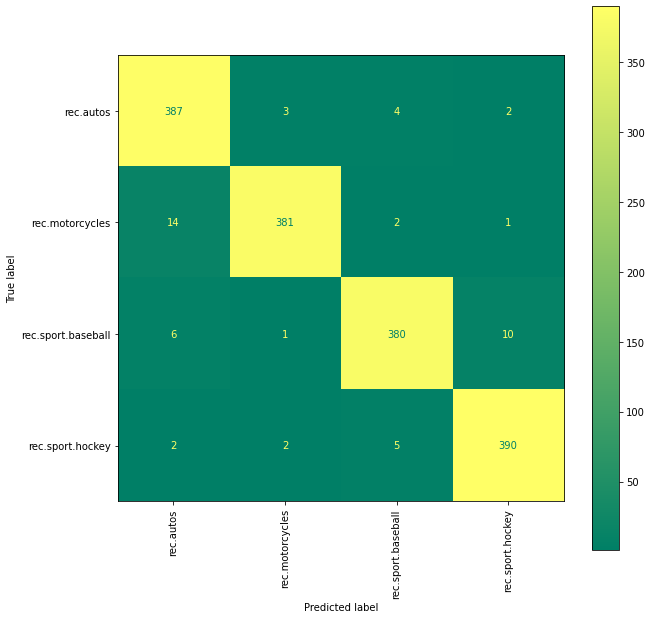

In [100]:
cm = confusion_matrix(y_test, nn_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rec_train.target_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()


In [101]:
pd.DataFrame(classification_report(y_test, nn_pred_test, output_dict=True)).T



,precision,recall,f1-score,support
0,0.946210,0.977273,0.961491,396.000000
1,0.984496,0.957286,0.970701,398.000000
2,0.971867,0.957179,0.964467,397.000000
3,0.967742,0.977444,0.972569,399.000000
accuracy,0.967296,0.967296,0.967296,0.967296
macro avg,0.967579,0.967295,0.967307,1590.000000
weighted avg,0.967603,0.967296,0.967319,1590.000000


  (0, 15561)	0.1264460277139044
  (0, 17012)	0.04635217229691379
  (0, 15348)	0.1264460277139044
  (0, 12688)	0.05867738446370229
  (0, 10144)	0.12854126237646807
  (0, 6565)	0.09153929983760208
  (0, 16232)	0.06427063118823403
  (0, 15277)	0.07632286404465054
  (0, 12742)	0.060273377623443765
  (0, 11910)	0.07259698253422738
  (0, 12699)	0.06685041909003682
  (0, 13795)	0.09605746096643548
  (0, 4382)	0.10230514703496763
  (0, 16064)	0.05714082423481055
  (0, 12285)	0.07797057716762815
  (0, 13653)	0.10362292143779019
  (0, 9702)	0.1264460277139044
  (0, 8466)	0.08747514582242623
  (0, 6564)	0.06414543369423577
  (0, 5204)	0.0794820407588534
  (0, 10714)	0.09364387063110023
  (0, 5971)	0.1264460277139044
  (0, 11281)	0.08696853997034998
  (0, 7105)	0.10362292143779019
  (0, 16021)	0.06871619356148786
  :	:
  (0, 14794)	0.08799783706036546
  (0, 6670)	0.10108507850420814
  (0, 4128)	0.09313031149500932
  (0, 7839)	0.10584407129105446
  (0, 15881)	0.07714410136786372
  (0, 15968)	0.0631